# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


Answers for questions 1, 2 & 3:

After considering the drawbacks of False Positives VS False Negatives, which is the cost of having team members reviewing more predicted 'Claims' so that more actual ‘Claims’ could be caught VS the cost of having a model that identifies less actual ‘Claims’ but reducing the amount of predicted 'Claims' to be reviewed by team members. My thought is that it is better to reduce the amount of False Negatives.

A False negative value means that the model predicted a user’s post as ‘Opinion’ when in fact it is a ‘Claim’. Whereas a False positive value means that the model predicted a user’s post as ‘Claim’ when in fact it is an ‘Opinion’. 

As the use case of the model is to prioritize accurately identifying as much ‘Claims’ as possible, while reducing the response time by automating the initial stages of this process, my thought is that the recall score may be a slightly better metric than the precision score for this use case. Although it is still ideal for both precision and recall score to score well, having a higher recall score means that the most amount of 'Claims' could be predicted and therefore recall score should be used to evaluate the success of my model.


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [96]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import pickle

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data[data.duplicated()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


Check for and handle outliers.

The following is the code snippet I wrote for checking and handling outlier, but since the activity is to build a random forest model, I realized there is no need to impute or drop any values for where they belong under the distribution, therefore this code is only written for reference, and would be skipped for this activity.


In [12]:
''' 
The following is the code snippet I wrote for checking and handling outlier, but since the activity is to build a random forest model, 
I realized there is no need to impute or drop any values for where they belong under the distribution.

# Define function to handle outliers and display the upper bound of the specific column
def handle_outlier(df,col_name,percentile):
    upper = df[col_name].quantile(percentile)
    # locate and replace outliers with upper bound value
    outliers_count = df[df[col_name] > upper].shape[0]
    df.loc[df[col_name] > upper, col_name] = upper
    print('Column: {}\n Percentile: {}\n Upper bound: {:.2f}\n Outliers replaced: {}\n'.format(col_name,percentile,upper,outliers_count))

# handle_outlier() for each numeric variables in the dataset
for col in ['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']:
    handle_outlier(data,col,0.95)
'''

" \nThe following is the code snippet I wrote for checking and handling outlier, but since the activity is to build a random forest model, \nI realized there is no need to impute or drop any values for where they belong under the distribution.\n\n# Define function to handle outliers and display the upper bound of the specific column\ndef handle_outlier(df,col_name,percentile):\n    upper = df[col_name].quantile(percentile)\n    # locate and replace outliers with upper bound value\n    outliers_count = df[df[col_name] > upper].shape[0]\n    df.loc[df[col_name] > upper, col_name] = upper\n    print('Column: {}\n Percentile: {}\n Upper bound: {:.2f}\n Outliers replaced: {}\n'.format(col_name,percentile,upper,outliers_count))\n\n# handle_outlier() for each numeric variables in the dataset\nfor col in ['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']:\n    handle_outlier(data,col,0.95)\n"

Check class balance.

In [13]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].str.len()
# Display first few rows of dataframe after adding new column
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [15]:
### YOUR CODE HERE ###
data.groupby('claim_status').agg({'text_length':'mean'})

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

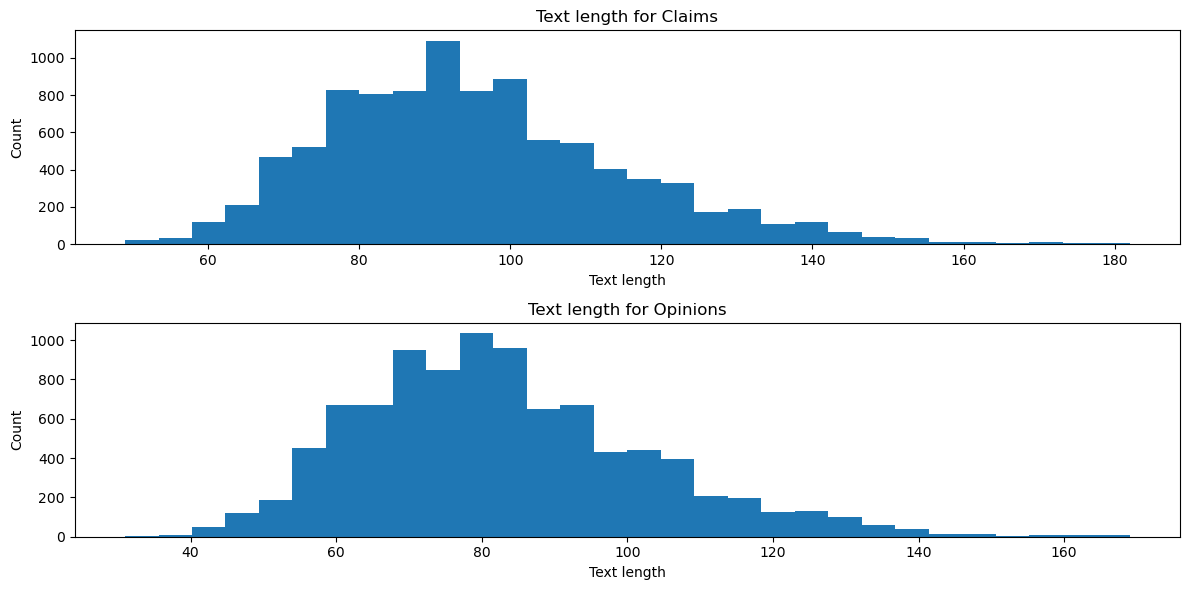

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
# Create figure and axes
fig, (ax1,ax2) = plt.subplots(2,figsize=(12,6))

claim = data[data['claim_status'] == 'claim']
opinion = data[data['claim_status'] == 'opinion']
# Plot histograms
ax1.hist(claim['text_length'],bins=30)
ax2.hist(opinion['text_length'],bins=30)

# Add labels
ax1.set_xlabel('Text length')
ax1.set_ylabel('Count')
ax2.set_xlabel('Text length')
ax2.set_ylabel('Count')

# Add titles
ax1.set_title('Text length for Claims')
ax2.set_title('Text length for Opinions')

# Show figure
plt.tight_layout()
plt.show()

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

**Feature selection and transformation**

Encode target and catgorical variables.

In [17]:
### YOUR CODE HERE ###
# Encode and assign target variable
y = data['claim_status'].replace({'claim':1,'opinion':0})

# Encode categorical variables
X = data.drop(columns=['claim_status','#','video_id','video_transcription_text'],axis=1)
X = pd.get_dummies(X,
                   columns=['verified_status','author_ban_status'],
                   drop_first=True)
# Display first few rows
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [18]:
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [19]:
### YOUR CODE HERE ###
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [20]:

### YOUR CODE HERE ###
print('Train + Validate shape:',X_train.shape)
print('Train shape:',X_tr.shape)
print('Validate shape:',X_val.shape)
print('Test shape:',X_test.shape)

Train + Validate shape: (15267, 10)
Train shape: (11450, 10)
Validate shape: (3817, 10)
Test shape: (3817, 10)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [41]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'n_estimators':[50,100,200],
            'max_depth':[3,5,7],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2],
            'max_features':[.2,'sqrt'],
            'max_samples':[.6]}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {'recall','f1','precision','accuracy'}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [42]:
'''
%%time
rf_cv.fit(X_tr,y_tr)

# Pickle the model for future use
with open('rf_cv.pkl','wb') as write:
    pickle.dump(rf_cv,write)
'''

CPU times: user 3min 1s, sys: 375 ms, total: 3min 1s
Wall time: 3min 1s


In [43]:
# reopen the fitted model
with open('rf_cv.pkl','rb') as read:
    rf_cv = pickle.load(read)

In [44]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9910316563029961

In [45]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
rfcv_results = rf_cv.cv_results_
rfcv_results_df = pd.DataFrame(rf_results)
rfcv_results_df.head()

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
rfcv_best_precision = rf_results_df.sort_values(by=['mean_test_precision'],ascending=False).reset_index(drop=True).iloc[0]
rfcv_best_precision

mean_fit_time                                                       0.193549
std_fit_time                                                        0.001491
mean_score_time                                                      0.01794
std_score_time                                                      0.000854
param_max_depth                                                            3
param_max_features                                                      sqrt
param_max_samples                                                        0.6
param_min_samples_leaf                                                     1
param_min_samples_split                                                    3
param_n_estimators                                                        50
params                     {'max_depth': 3, 'max_features': 'sqrt', 'max_...
split0_test_f1                                                      0.994365
split1_test_f1                                                      0.994801

In [46]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_samples=0.6, n_estimators=50,
                       random_state=42)

**Question:** How well is your model performing? Consider average recall score and precision score.

This model performed very well, with score of over 0.99 in both precision and recall, which is near perfect.

### **Build an XGBoost model**

In [25]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
xgb_cv_params = {'n_estimators':[50,100,200],
                'max_depth':[3,5],
                'min_child_weight':[1,3,5],
                'learning_rate':[0.01,0.1,0.3],
                'colsample_bytree':[.2,.7],
                'subsample':[.2,.7]}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {'f1', 'precision', 'recall', 'accuracy'}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb,xgb_cv_params,scoring=scoring,cv=5,refit='recall')

In [29]:
'''
%%time
xgb_cv.fit(X_tr,y_tr)

# Pickle the model for future use
with open('xgb_cv.pkl','wb') as write:
    pickle.dump(xgb_cv,write)
'''

CPU times: user 8min 50s, sys: 3.55 s, total: 8min 54s
Wall time: 4min 36s


In [26]:
# load the fitted model from previous cell
with open('xgb_cv.pkl','rb') as read:
    xgb_cv = pickle.load(read)

In [35]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
xgbcv_result = xgb_cv.cv_results_
xgbcv_result_df = pd.DataFrame(xgbcv_result)

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
xgbcv_best_precision = xgbcv_result_df.sort_values(by=['mean_test_precision'],ascending=False).iloc[0]
xgbcv_best_precision

mean_fit_time                                                      0.097462
std_fit_time                                                       0.000764
mean_score_time                                                    0.009467
std_score_time                                                     0.000081
param_colsample_bytree                                                  0.7
param_learning_rate                                                    0.01
param_max_depth                                                           3
param_min_child_weight                                                    1
param_n_estimators                                                       50
param_subsample                                                         0.2
params                    {'colsample_bytree': 0.7, 'learning_rate': 0.0...
split0_test_accuracy                                               0.994323
split1_test_accuracy                                               0.993886
split2_test_

In [39]:
xgb_cv.best_score_

0.9917214602362321

**Question:** How well does your model perform? Consider recall score and precision score.

The best recall score of the XGBoost model is .99 and the best precision score is 1, both scores are very high, implying the model did a very great job at predicting both true positives and true negatives.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [75]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [76]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1, 0, 0, ..., 0, 0, 1])

Display the true labels of the testing set.

In [77]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

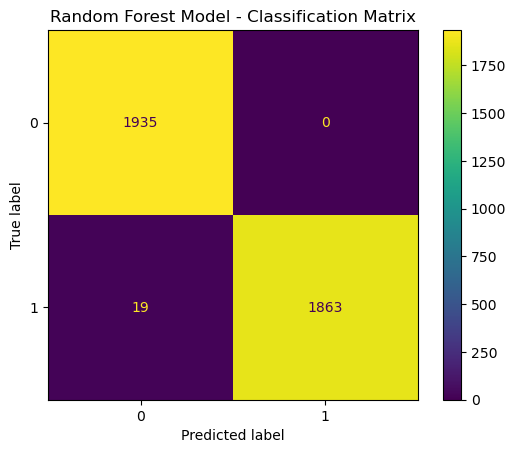

In [78]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val,y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
cm_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random Forest Model - Classification Matrix')
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [70]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
from sklearn.metrics import classification_report

rf_report = classification_report(y_val, y_pred)

# Print the report
print(rf_report)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The classification report shows that the model's performance were near perfect, of the 1882 true positive labels, only 19 were falsely predicted as negative.

#### **XGBoost**

In [73]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
xgb_pred = xgb_cv.best_estimator_.predict(X_val)
xgb_pred

array([1, 0, 0, ..., 0, 0, 1])

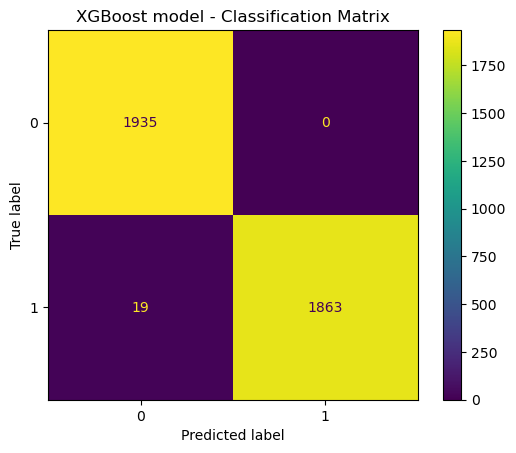

In [74]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
xgbcm = confusion_matrix(y_val,xgb_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
xgbcm_disp = ConfusionMatrixDisplay(confusion_matrix=xgbcm,display_labels=xgb_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
xgbcm_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('XGBoost model - Classification Matrix')
plt.show()

In [71]:
# Create a classification report
### YOUR CODE HERE ###

xgb_report = classification_report(y_val, xgb_pred)

# Print the report
print(xgb_report)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The XGBoost model results yielded the exact same scores as the random forest model. Since both models yielded the same results, I shall proceed with the data science lead's recommendation of using a random forest model as the champion model.

### **Use champion model to predict on test data**

In [79]:
### YOUR CODE HERE ###
test_pred = rf_cv.best_estimator_.predict(X_test)

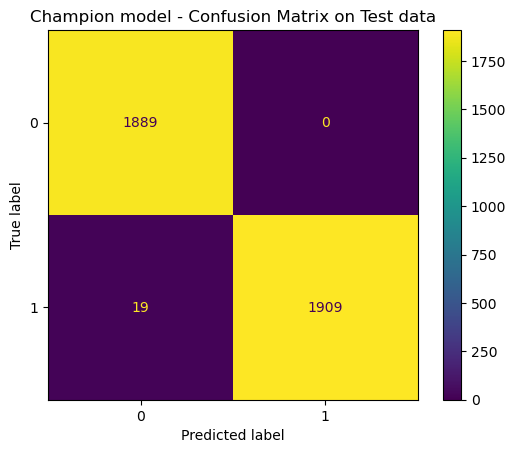

In [80]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
test_cm = confusion_matrix(y_test, test_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
test_cmdisp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
test_cmdisp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Champion model - Confusion Matrix on Test data')
plt.show()

#### **Feature importances of champion model**


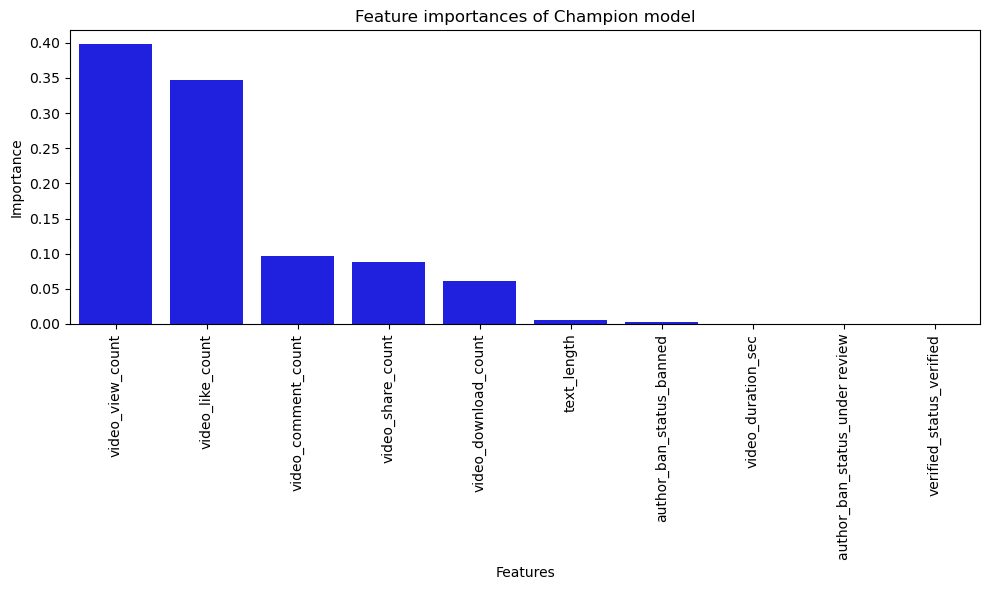

In [111]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
importances_df = pd.DataFrame(importances,index=X.columns, columns=['Importance'])
importances_df = importances_df.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances_df.index, y=importances_df['Importance'],color='Blue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances of Champion model')
plt.tight_layout()
plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. With the remarkable results from this model, I would recommend using this model as it has a near perfect predictive accuracy.

2. My model is made using an ensemble of decision trees created from the data to predict the 'Claim' variable, the prediction results of these trees are aggregated into a single prediction for each set of variables.

3. The new feature(s) that may improve model performance could be features that quantifies each combination of text transcribed through other algorithms or methods. Such a feature could help put meaning into the words spoken in the video and could be very meaningful to the prediction.

4. In the perfect world, features that may be the most valuable for the solution might be a metric score for users’ critical reasoning, intelligence, or some other variable that could discern the users’ social media habits.  These features were all previously researched by previous researchers and could be meaningful for the answer to this question. However, the gathering of these data is hard and may be unethical.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.